Load image and get the histogram


In [1]:
import os, io
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from PIL import Image

data_dir = '../data/'

In [2]:
pgm = Image.open(data_dir+"custom2.pgm")
print(len(pgm.split()))

1


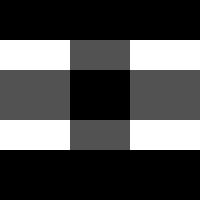

In [3]:
pgm

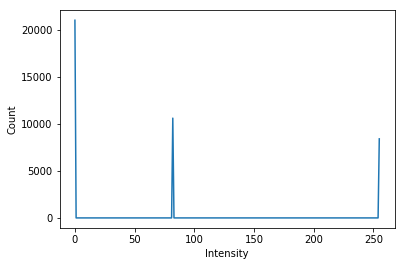

In [4]:
a = pgm.histogram()
def plot_histogram(a):
    %matplotlib inline
    plt.plot(a)
    plt.ylabel('Count')
    plt.xlabel('Intensity')
    plt.show()
plot_histogram(a)

In [5]:
def load_image(image_path):  
    filename =os.path.abspath(image_path)
    im = Image.open(filename)
    height = im.height
    width  = im.width
    im = im.convert('RGB')
    channels = len(im.split())
    return (im,width,height,channels)

# Histogram
Historam in rgb will be 3 else 1 

In [6]:
def get_histogram(image):
    channels = len(image.split())
    pixels = np.asarray(image)
    channel_hist= np.zeros((channels,256),dtype=np.int)
   
    #histogram=[len(channels),[]]
    for c in range(channels):
        for y in range(image.height):
            for x in range(image.width):
                if(channels > 1):
                    value = pixels[c][y][x] # Image is flipped :\
                else:
                    value = pixels[y][x]
                #print(value)
                channel_hist[c][value]+=1
    return channel_hist

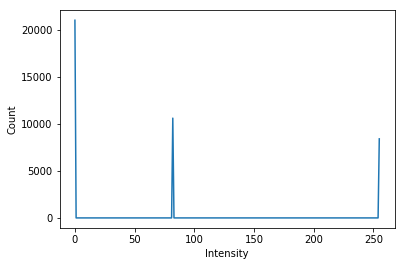

In [7]:
temp =get_histogram(pgm)
plot_histogram(temp[0])

In [8]:
def topographic(image):
    channels = len(image.split())
    pixels = np.asarray(image)
    
    top= np.zeros((channels,image.height,image.width),dtype=np.int)
   
    #histogram=[len(channels),[]]
    for c in range(channels):
        for y in range(image.height):
            for x in range(image.width):
                if(channels > 1):
                    value = pixels[c][y][x] # Image is flipped :\
                else:
                    value = pixels[y][x]
                top[c][y][x]=value
    return top

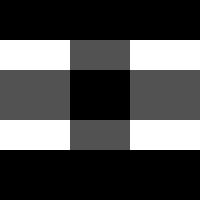

In [9]:
top =topographic(pgm)
pgm

In [10]:
def pl3(data_array):
    %matplotlib inline
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
 
    x_data, y_data = np.meshgrid( np.arange(data_array.shape[1]),
                                  np.arange(data_array.shape[0]) )
   
    x_data = x_data.flatten()
    y_data = y_data.flatten()
    z_data = data_array.flatten()
    ax.bar3d( x_data,
              y_data,
              np.zeros(len(z_data)),
              10, 10, z_data )

    ax.view_init(30, 360)
    plt.show()
    
 


[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]


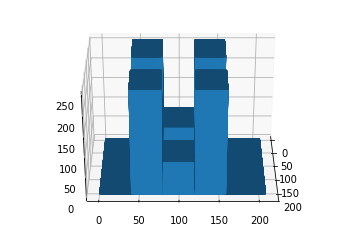

In [11]:
print(np.asarray(top[0]))
pl3(np.asarray(top[0]))

# Watershed
* find the min

In [12]:
def watershed(image):
 
    pixels = np.array(image)
    print(pixels)
    section = []
    result = []
    for i in range(256):
        section = np.full((image.height,image.width),255)
        for y in range(image.height):            
            for x in range(image.width):
                if i == pixels[y][x]:
                    section[y][x]= 0 #pixels[y][x]
        if i ==0 or i ==82 or i ==255:
            result.append(section) 
                        
    return result
sec = watershed(pgm)


[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]


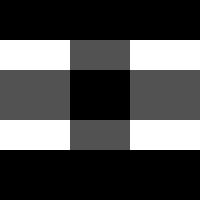

In [13]:
pgm

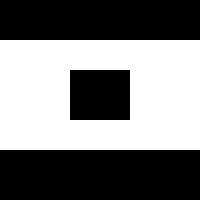

In [14]:
img3 = Image.fromarray(sec[0])
img3 = img3.convert('RGB')
img3

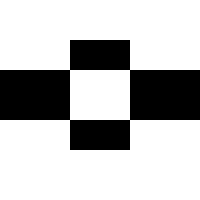

In [15]:
img3 = Image.fromarray(sec[1])
img3 = img3.convert('RGB')
img3

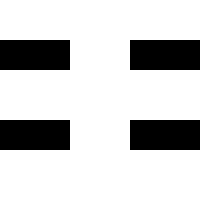

In [16]:
img3 = Image.fromarray(sec[2])
img3 = img3.convert('RGB')
img3